In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import cv2
from keras.datasets import fashion_mnist#download mnist data and split into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout#create model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16



Using TensorFlow backend.


## STAGE 1 = GENERATING NUMPY DATASETS AND SAVING THEM
## STAGE 2 = USING THE NUMPY DATASETS TO RUN MODELS AND SAVING WEIGHTS
## STAGE 3 = LOADING WEIGHTS OF ABOVE MODEL AND USING THEM
## STAGE 4 = TRYING DATA AUGMENTATION BY USING DATASETS FROM STAGE 1
## STAGE 5 = TRYING TRANSFER LEARNING

# <div align="center">STAGE I</div>

In [2]:
CAT_TRAIN_PATH="/kaggle/input/cat-and-dog/training_set/training_set/cats/"
DOG_TRAIN_PATH="/kaggle/input/cat-and-dog/training_set/training_set/dogs/"
CAT_TEST_PATH="/kaggle/input/cat-and-dog/test_set/test_set/cats/"
DOG_TEST_PATH="/kaggle/input/cat-and-dog/test_set/test_set/dogs/"

In [3]:
def preprocess_img(img):
    dim=(100,100)
    res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    return res
    

In [4]:
#Building up datasets
l=len(list(os.listdir(CAT_TRAIN_PATH)))
index=0
lst=[]
y=[]
for file in os.listdir(CAT_TRAIN_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(CAT_TRAIN_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(1)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))
        #print(im.shape)
        #print(lst.shape)
        #print(y.shape)
    
l=len(list(os.listdir(DOG_TRAIN_PATH)))
index=0
for file in os.listdir(DOG_TRAIN_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(DOG_TRAIN_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(0)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))


        

Finished Reading 40/4001
Finished Reading 80/4001
Finished Reading 120/4001
Finished Reading 160/4001
Finished Reading 200/4001
Finished Reading 240/4001
Finished Reading 280/4001
Finished Reading 320/4001
Finished Reading 360/4001
Finished Reading 400/4001
Finished Reading 440/4001
Finished Reading 480/4001
Finished Reading 520/4001
Finished Reading 560/4001
Finished Reading 600/4001
Finished Reading 640/4001
Finished Reading 680/4001
Finished Reading 720/4001
Finished Reading 760/4001
Finished Reading 800/4001
Finished Reading 840/4001
Finished Reading 880/4001
Finished Reading 920/4001
Finished Reading 960/4001
Finished Reading 1000/4001
Finished Reading 1040/4001
Finished Reading 1080/4001
Finished Reading 1120/4001
Finished Reading 1160/4001
Finished Reading 1200/4001
Finished Reading 1240/4001
Finished Reading 1280/4001
Finished Reading 1320/4001
Finished Reading 1360/4001
Finished Reading 1400/4001
Finished Reading 1440/4001
Finished Reading 1480/4001
Finished Reading 1520/4001


In [5]:

print(np.array(lst).shape)
print(np.array(y).shape)

(8005, 100, 100, 3)
(8005,)


In [6]:
X_train=np.array(lst)
Y_train=np.array(y)
np.savez("CAT_DOG_X_train",X_train)
np.savez("CAT_DOG_Y_train",Y_train)
print(X_train.shape)
print(Y_train.shape)


(8005, 100, 100, 3)
(8005,)


In [7]:
#Building up datasets
l=len(list(os.listdir(CAT_TEST_PATH)))
index=0
lst=[]
y=[]
for file in os.listdir(CAT_TEST_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(CAT_TEST_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(1)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))
        #print(im.shape)
        #print(lst.shape)
        #print(y.shape)
    
l=len(list(os.listdir(DOG_TEST_PATH)))
index=0
for file in os.listdir(DOG_TEST_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(DOG_TEST_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(0)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))


        

Finished Reading 40/1012
Finished Reading 80/1012
Finished Reading 120/1012
Finished Reading 160/1012
Finished Reading 200/1012
Finished Reading 240/1012
Finished Reading 280/1012
Finished Reading 320/1012
Finished Reading 360/1012
Finished Reading 400/1012
Finished Reading 440/1012
Finished Reading 480/1012
Finished Reading 520/1012
Finished Reading 560/1012
Finished Reading 600/1012
Finished Reading 640/1012
Finished Reading 680/1012
Finished Reading 720/1012
Finished Reading 760/1012
Finished Reading 800/1012
Finished Reading 840/1012
Finished Reading 880/1012
Finished Reading 920/1012
Finished Reading 960/1012
Finished Reading 1000/1012
Finished Reading 40/1013
Finished Reading 80/1013
Finished Reading 120/1013
Finished Reading 160/1013
Finished Reading 200/1013
Finished Reading 240/1013
Finished Reading 280/1013
Finished Reading 320/1013
Finished Reading 360/1013
Finished Reading 400/1013
Finished Reading 440/1013
Finished Reading 480/1013
Finished Reading 520/1013
Finished Readin

In [8]:
X_test=np.array(lst)
Y_test=np.array(y)
print(X_test.shape)
print(Y_test.shape)
np.save("CAT_DOG_X_test",X_test)
np.save("CAT_DOG_Y_test",Y_test)

(2023, 100, 100, 3)
(2023,)


# <div align="center">STAGE II</div>

# Till last part we converted into numpy arrays and stored them. Now we inputted the same arrays and we would read from them

# GETTING DATA INTO THE DIFFERENT SETS

In [9]:
X_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_train.npz"
X_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_test.npy"
Y_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_train.npz"
Y_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_test.npy"

In [10]:
a=np.load(X_TRAIN_FILE)
X_train=a.f.arr_0
a=np.load(Y_TRAIN_FILE)
Y_train=a.f.arr_0
a=np.load(X_TEST_FILE)
X_test=a
a=np.load(Y_TEST_FILE)
Y_test=a


In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8005, 100, 100, 3)
(8005,)
(2023, 100, 100, 3)
(2023,)


In [12]:
print("Distribution of cats and dogs in the different sets")
print("TRAIN  :  "+str(sum(Y_train==1))+" cats vs "+str(sum(Y_train==0))+" dogs")
print("TEST  :  "+str(sum(Y_test==1))+" cats vs "+str(sum(Y_test==0))+" dogs")

Distribution of cats and dogs in the different sets
TRAIN  :  4000 cats vs 4005 dogs
TEST  :  1011 cats vs 1012 dogs


In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(6003, 100, 100, 3)
(6003,)
(2002, 100, 100, 3)
(2002,)
(2023, 100, 100, 3)
(2023,)


In [15]:
print("Distribution of cats and dogs in the different sets")
print("TRAIN  :  "+str(sum(Y_train==1))+" cats vs "+str(sum(Y_train==0))+" dogs")
print("VAL  :  "+str(sum(Y_val==1))+" cats vs "+str(sum(Y_val==0))+" dogs")
print("TEST  :  "+str(sum(Y_test==1))+" cats vs "+str(sum(Y_test==0))+" dogs")

Distribution of cats and dogs in the different sets
TRAIN  :  2982 cats vs 3021 dogs
VAL  :  1018 cats vs 984 dogs
TEST  :  1011 cats vs 1012 dogs


Images 1 to 5 :
1


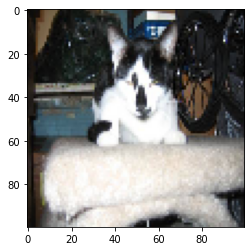

1


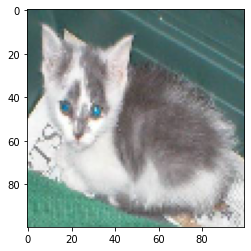

0


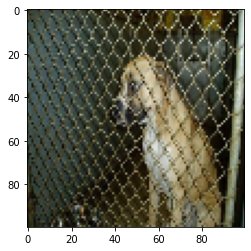

0


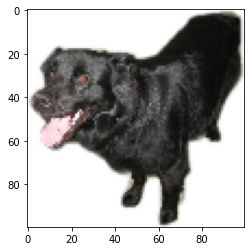

1


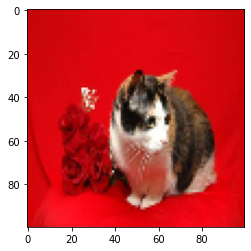

In [16]:

print("Images 1 to 5 :")
for i in range(0,5):
    plt.imshow(X_train[i])
    print(Y_train[i])
    plt.show()

# UTILITY FUNCTIONS

In [17]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [18]:
def preprocess_data(X_train,X_val,X_test,y_train,y_val,y_test):
    X_train=normalize_X(X_train)
    X_val=normalize_X(X_val)
    X_test=normalize_X(X_test)
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_val, y_val = shuffle(X_val, y_val, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [19]:
X_train,X_val,X_test,Y_train,Y_val,Y_test=preprocess_data(X_train,X_val,X_test,Y_train,Y_val,Y_test)

In [20]:


def input_and_run(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    opt2=SGD(lr=alpha, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))



In [21]:
##BUILDING THE MODEL 1

model1 = Sequential()#add model layers

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='sigmoid'))

print(model1.summary())
input_and_run(model1,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.0001,num_epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)            

# The previous model gives us (learning_rate = 0.0001, epochs =20)
# TRAINING ACCURACY : 99.7%
# VALIDATION ACCURACY : 79.07%
# TEST ACCURACY : 77.46%

In [22]:
##BUILDING THE MODEL 1

model2 = Sequential()#add model layers

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())
input_and_run(model2,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.002,num_epochs=200)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)      

In [23]:
model2.save("model2.h5")
print("Saved model to disk")

Saved model to disk


# The previous model gives us (learning_rate = 0.002, epochs =200)
# TRAINING ACCURACY : 99.8%
# VALIDATION ACCURACY : 81.8%
# TEST ACCURACY : 83.8%

# <div align="center">STAGE III</div>

In [24]:
WEIGHTS_FILE="/kaggle/input/cat-dog-numpy/model2.h5"

In [25]:
from keras.models import load_model
# load model
loaded_model=load_model(WEIGHTS_FILE)
print("Loaded model from disk")

Loaded model from disk


In [26]:
#Getting results
opt = keras.optimizers.Adam(learning_rate=0.002)
loaded_model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
result = loaded_model.evaluate(X_train,Y_train)
#print(result)
print("Training accuracy = "+str(result[1]*100))
result = loaded_model.evaluate(X_val,Y_val)
#print(result)
print("Validation accuracy = "+str(result[1]*100))
result = loaded_model.evaluate(X_test,Y_test)
#print(result)
print("Test accuracy = "+str(result[1]*100))


6003/6003 [==============================] - 1s 237us/step
Training accuracy = 95.80209851264954
2002/2002 [==============================] - 0s 223us/step
Validation accuracy = 94.65534687042236
2023/2023 [==============================] - 0s 218us/step
Test accuracy = 83.63816142082214


# <div align="center">STAGE IV</div>

## TRYING DATA AUGMENTATION

In [27]:
X_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_train.npz"
X_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_test.npy"
Y_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_train.npz"
Y_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_test.npy"

In [28]:
a=np.load(X_TRAIN_FILE)
X_train=a.f.arr_0
a=np.load(Y_TRAIN_FILE)
Y_train=a.f.arr_0
a=np.load(X_TEST_FILE)
X_test=a
a=np.load(Y_TEST_FILE)
Y_test=a

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(6003, 100, 100, 3)
(6003,)
(2002, 100, 100, 3)
(2002,)
(2023, 100, 100, 3)
(2023,)


In [30]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [31]:
def preprocess_data(X_train,X_val,X_test,y_train,y_val,y_test):
    X_train=normalize_X(X_train)
    X_val=normalize_X(X_val)
    X_test=normalize_X(X_test)
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_val, y_val = shuffle(X_val, y_val, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [32]:
X_train,X_val,X_test,Y_train,Y_val,Y_test=preprocess_data(X_train,X_val,X_test,Y_train,Y_val,Y_test)

In [33]:


def input_and_run2(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    
    datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
    datagen.fit(X_train)
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    opt2=SGD(lr=alpha, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    model.fit(datagen.flow(X_train, y_train),validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))




In [34]:
##BUILDING THE MODEL 1

model4 = Sequential()#add model layers

model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

print(model4.summary())
input_and_run2(model4,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.001,num_epochs=200)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 128)      

## The previous model gives us (learning_rate = 0.001, epochs = 200)(using datagen iterator)
# TRAINING ACCURACY : 98.55%
# VALIDATION ACCURACY : 91.45%
# TEST ACCURACY : 92.09%

In [35]:
model4.save("model4.h5")
print("Saved model to disk")

Saved model to disk


# <div align="center">STAGE V</div>

In [36]:
X_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_train.npz"
X_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_test.npy"
Y_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_train.npz"
Y_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_test.npy"

In [37]:
a=np.load(X_TRAIN_FILE)
X_train=a.f.arr_0
a=np.load(Y_TRAIN_FILE)
Y_train=a.f.arr_0
a=np.load(X_TEST_FILE)
X_test=a
a=np.load(Y_TEST_FILE)
Y_test=a

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(6003, 100, 100, 3)
(6003,)
(2002, 100, 100, 3)
(2002,)
(2023, 100, 100, 3)
(2023,)


In [39]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [40]:
def preprocess_data(X_train,X_val,X_test,y_train,y_val,y_test):
    X_train=normalize_X(X_train)
    X_val=normalize_X(X_val)
    X_test=normalize_X(X_test)
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_val, y_val = shuffle(X_val, y_val, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [41]:
X_train,X_val,X_test,Y_train,Y_val,Y_test=preprocess_data(X_train,X_val,X_test,Y_train,Y_val,Y_test)

In [42]:


def input_and_run3(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    
    #datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
    #datagen.fit(X_train)
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    opt2=SGD(lr=alpha, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=num_epochs)
    #model.fit(datagen.flow(X_train, y_train),validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))




In [43]:
model5 = Sequential()
model5.add(VGG16(include_top=False, input_shape=(100, 100, 3)))
# mark loaded layers as not trainable
for layer in model5.layers:
    layer.trainable = False
# add new classifier layers
#flat1 = Flatten()(model.layers[-1].output)
#class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
#output = Dense(1, activation='sigmoid')(class1)

model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))
print(model5.summary())
input_and_run3(model5,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.001,num_epochs=200)


# define new model
#model = Model(inputs=model.inputs, outputs=output)
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#return model

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 15,304,769
Trainable params: 590,081
Non-trainable params: 14,714,688
_________________________________________________________________
None
Train on 6003 samples, validate 

# The previous model gives us (learning_rate = 0.001, epochs = 200)

# Accuracy in first epoch was 80% 

# TRAINING ACCURACY : 100%
# VALIDATION ACCURACY : 86.76%
# TEST ACCURACY : 87.09%

In [44]:
model5.save("model5.h5")
print("Saved model to disk")

Saved model to disk


# <div align="center">STAGE VI</div>

# DATA AUGMENTATION + TRANSFER LEARNING

In [45]:
X_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_train.npz"
X_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_test.npy"
Y_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_train.npz"
Y_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_test.npy"

In [46]:
a=np.load(X_TRAIN_FILE)
X_train=a.f.arr_0
a=np.load(Y_TRAIN_FILE)
Y_train=a.f.arr_0
a=np.load(X_TEST_FILE)
X_test=a
a=np.load(Y_TEST_FILE)
Y_test=a

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(6003, 100, 100, 3)
(6003,)
(2002, 100, 100, 3)
(2002,)
(2023, 100, 100, 3)
(2023,)


In [48]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [49]:
def preprocess_data(X_train,X_val,X_test,y_train,y_val,y_test):
    X_train=normalize_X(X_train)
    X_val=normalize_X(X_val)
    X_test=normalize_X(X_test)
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_val, y_val = shuffle(X_val, y_val, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [50]:
X_train,X_val,X_test,Y_train,Y_val,Y_test=preprocess_data(X_train,X_val,X_test,Y_train,Y_val,Y_test)

In [51]:


def input_and_run4(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    
    datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
    datagen.fit(X_train)
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    opt2=SGD(lr=alpha, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    #model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=num_epochs)
    model.fit(datagen.flow(X_train, y_train),validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))




In [52]:
model6 = Sequential()
model6.add(VGG16(include_top=False, input_shape=(100, 100, 3)))
# mark loaded layers as not trainable
for layer in model6.layers:
    layer.trainable = False
# add new classifier layers
#flat1 = Flatten()(model.layers[-1].output)
#class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
#output = Dense(1, activation='sigmoid')(class1)

model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))
print(model6.summary())
input_and_run4(model6,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.001,num_epochs=200)


# define new model
#model = Model(inputs=model.inputs, outputs=output)
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#return model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 15,304,769
Trainable params: 590,081
Non-trainable params: 14,714,688
_________________________________________________________________
None
Epoch 1/200
188/188 [==============================] - 19s 103ms/step - loss: 0.5058 - accuracy: 

# The previous model gives us (learning_rate = 0.001, epochs = 200)

# Accuracy in first epoch was 80% 

# TRAINING ACCURACY : 97.03%
# VALIDATION ACCURACY : 87.81%
# TEST ACCURACY : 87.83%

In [53]:
model6.save("model6.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
a=4